In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# 9.1 Simulated Annealing

In [3]:
#set initial state s randomly
N = 6
s = np.sign(np.random.rand(N)-.5)

#w arbitrary, but symmetrically and with zero diagonal
#best to pick from -1 to 1
w = np.random.rand(N,N)*2-1
for i in range(N):
    w[i,i] = 0
    for j in range(i):
        w[j,i] = w[i,j]

In [4]:
#the cost (“energy”)
def E(s, w):
    total = 0
    for i in range(len(s)):
        for j in range(len(s)):
            total = total + w[i,j]*s[i]*s[j]
    return -.5 * total

def Ei(s, w, i):
    total = 0
    for j in range(len(s)):
        total = total + w[i,j]*s[i]*s[j]
    return -.5 * total

#The probability that the network is in a state s with energy E(s) is given by
def P(s, w, b):
    #print("P =",(1.0/Z(s,w,b)),"*",np.exp(-b * E(s,w)))
    #print("Z =",Z(s,w,b),"->",(1.0/Z(s,w,b)))
    #print("E =",E(s,w))
    return (1.0/Z(s,w,b)) * np.exp(-b * E(s,w))

#the partition function Z guarantees P (s) to be a valid probability mass function
#is given as the sum over all possible configurations
def Z(s, w, b):
    total = 0
    for i in range(len(s)):
        total = total + np.exp( -b * E(s, w))
    return total

In [5]:
def SimulatedAnnealing(s, w):
    # Initialization
    mys = s.copy()
    myw = w.copy()

    #set β0,τ>1
    b0 = .1
    tau = 1.001
    
    #tmax
    tmax = 8000
    
    #number of times to repeat
    #try both M=1 and M=500
    M = 700
    
    # Optimization
    Ts = np.zeros(tmax)
    Es = np.zeros(tmax)
    bt = b0
    #for each iteration t = 0, ..., tmax
    for t in range(tmax):
        
        #repeat the following M times (state update loop):
        for m in range(M):
            #select node i randomly
            i = np.random.randint(0, N)
            
            #determine the energies for the two options of state si and compute their difference
            sci = mys.copy()
            sfi = mys.copy()
            sfi[i] = sfi[i] * -1
            Ec = Ei(sci, myw, i)
            #Ef = -Ec
            Ef = Ei(sfi, myw, i)
            dE = Ef - Ec
            
            #Change to new state with some probability
            #flip state si with probability
            Pf = 1.0 / (1 + np.exp(bt*dE))
            if np.random.rand() < Pf:
                #print("Pf:", Pf,"flip",i)
                mys[i] = mys[i] * -1
            #print(Pf)
            #print(Pf*bt)
            
        #increase β
        bt = tau * bt
        
        #For plotting
        Ts[t] = 1.0/bt
        Es[t] = E(mys, myw)
    return s, Ts, Es
snew, Ts, Es = SimulatedAnnealing(s, w)
print("Done")

Done


/Users/henri/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:40: RuntimeWarning: overflow encountered in exp


# Plotting

S new: [ 1. -1. -1.  1. -1. -1.]


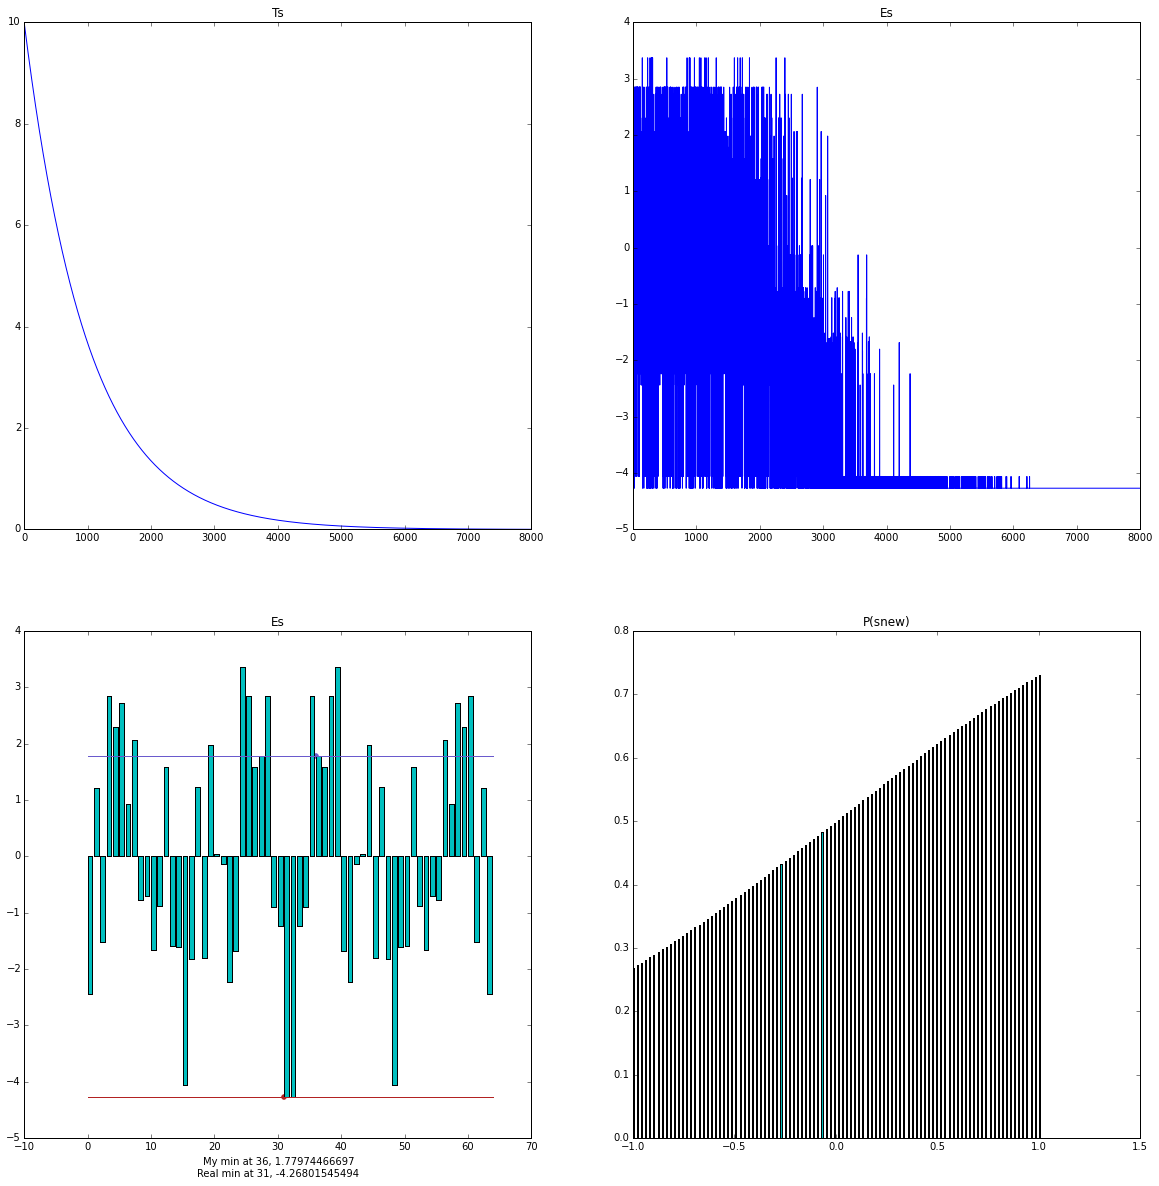

In [6]:
def MakeAllS(curs, depth):
    if depth == 0:
        return curs
    else:
        reso = MakeAllS(curs, depth-1)
        resn = []
        for i in range(len(reso)):
            resn.append(reso[i]+[-1])
            resn.append(reso[i]+[1])
        return resn

print("S new: "+str(snew))
allSs = MakeAllS([[-1],[1]], N-1)
allEs = [E(sc,w) for sc in allSs]
Emini = 0
Si = 0
for i in range(len(allSs)):
    #print(allEs[i], allEs[Emini])
    if allEs[i] < allEs[Emini]:
        #print("New Emin: "+str(allSs[i]))
        Emini = i
    if list(allSs[i]) == list(snew):
        Si = i
        #print(allSs[i])
        

ind = np.arange(len(np.arange(len(allEs))))  # the x locations for the groups
width = .75       # the width of the bars


#xs = [-10,-5,-1,-.5,-.1, -.05,-.01,-.005, -.001, -.0005, -.0001, 0, .0001, .0005, .001, .005, .01, .05, .1, .5, 1, 5, 10]
xs = np.linspace(-1,1,100)
#print(xs)
Pbs = [1.0 / (1 + np.exp(-myb)) for myb in xs]
#Pbs = [P(snew, w, x) for x in xs]

f, axarr = plt.subplots(2, 2, figsize=(20,20))
axarr[0, 0].plot(range(len(Ts)), Ts)
axarr[0, 0].set_title('Ts')
axarr[0, 1].plot(range(len(Es)), Es)
axarr[0, 1].set_title('Es')

axarr[1, 0].bar(ind, allEs, width, color='c')
axarr[1, 0].plot([0,64],[allEs[Si],allEs[Si]], color="slateblue")
axarr[1, 0].scatter([Si],[allEs[Si]], color="slateblue")
axarr[1, 0].plot([0,64],[allEs[Emini],allEs[Emini]], color="firebrick")
axarr[1, 0].scatter([Emini],[allEs[Emini]], color="firebrick")
axarr[1, 0].set_title('Es')
axarr[1, 0].set_xlabel('My min at '+str(Si)+', '+str(allEs[Si])+'\nReal min at '+str(Emini)+', '+str(allEs[Emini]))
axarr[1, 1].bar(xs, Pbs, .005, color='c')
axarr[1, 1].set_title('P(snew)')
plt.show()

# 9.2 Mean-Field Annealing

In [34]:
#set initial state s randomly
N = 6
s = np.sign(np.random.rand(N)-.5)

#w from above

In [50]:
#The cost (energy) function remains the same
def E(s, w):
    total = 0
    for i in range(len(s)):
        for j in range(len(s)):
            total = total + w[i,j]*s[i]*s[j]
    return -.5 * total

#The approximated probability of a state s is now given by
def Q(s, e, b):
    total=0
    for j in range(len(s)):
        total += e[j]*s[j]
    return (1.0/Z(s,w,b)) * np.exp(-b * total)

#the partition function Z guarantees P (s) to be a valid probability mass function
#is given as the sum over all possible configurations
def Z(s, w, b):
    total = 0
    for i in range(len(s)):
        total = total + np.exp( -b * E(s, w))
    return total

def e(s, w):
    mye = np.zeros(len(s))
    for i in range(len(s)):
        mye[i] = ei(s, w, i)
    return mye

def ei(s, w, i):
    myei = 0
    for j in range(len(s)):
        myei = myei + w[i,j]*s[j]
    return -1 * myei
    

In [51]:
def MeanFieldAnnealing(s, w):
    # Initialization
    mys = s.copy() + np.random.rand( 1,len(s) )/100.
    myw = w.copy()

    #β0 small enough, τ > 1
    b0 = .1
    tau = 1.01
    
    #set tmax, ε small enough
    tmax = 700
    epsilon = .00001
    
    #number of times to repeat
    #try both M=1 and M=500
    M = 500
    
    # Optimization
    Ts = np.zeros(tmax)
    Es = np.zeros(tmax)
    bt = b0
    eold = np.zeros(len(s))
    enew = eold
    iteration = 0
    maxiterations = 500
    
    #for each iteration t = 0, ..., tmax
    for t in range(tmax):
        eold = enew
        enew = e(s,w)
        
        #repeat the following until convergence, i.e., |enew − eold| < ε
        while np.absolute( np.min(enew - eold) ) > epsilon and iteration < maxiterations:
            #for i=1,...,N
            for i in range(N):
                #compute mean-field
                enew[i] = ei(s, w, i)
                
                #update the state
                s[i] = np.tanh(-bt * enew[i])
            
            iteration = iteration + 1
            
        #if iteration < maxiterations:
        #    print("converged at", iteration)
            
        #increase β
        bt = tau * bt
        
        #For plotting
        Ts[t] = 1.0/bt
        Es[t] = E(mys, myw)
    return s, Ts, Es
snew, Ts, Es = MeanFieldAnnealing(s, w)
print("S new: "+str(snew))

ValueError: setting an array element with a sequence.

# Plotting

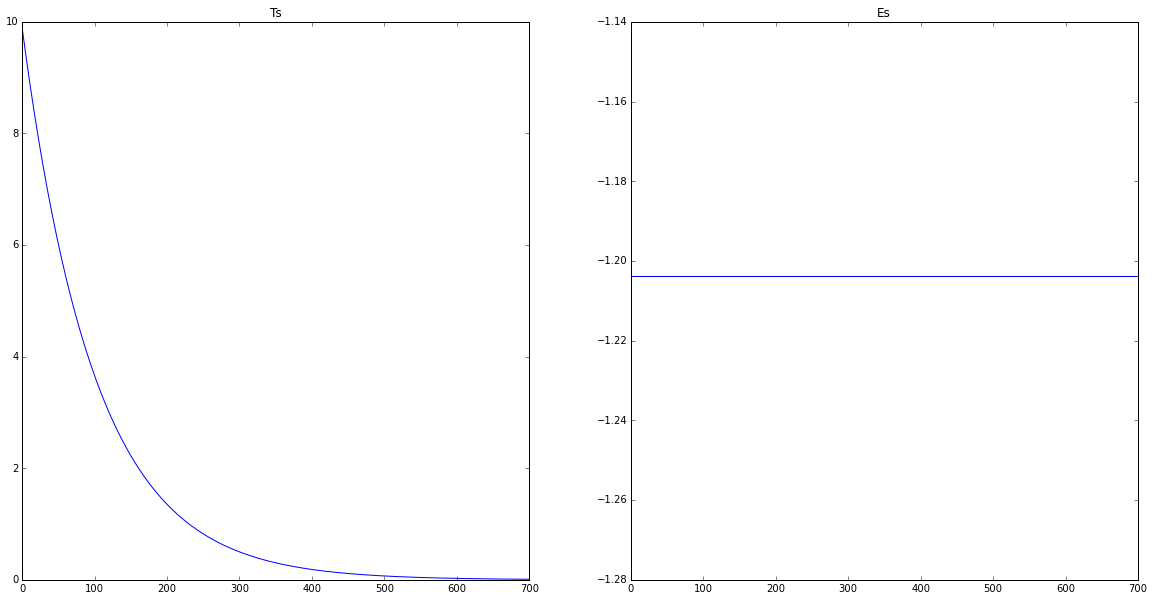

In [45]:
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].plot(range(len(Ts)), Ts)
axarr[0].set_title('Ts')
axarr[1].plot(range(len(Es)), Es)
axarr[1].set_title('Es')
plt.show()